In [528]:
#WRITE DF TO PICKLE
df.to_pickle('SavedDF/NO_T_DF.pkl')  # where to save it, usually as a .pkl
current_df.to_pickle('SavedDF/CURRENT_DF.pkl')

In [22]:
#WRITE DF TO PICKLE
df.to_pickle('SavedDF/Graph.pkl',protocol=4)  # where to save it, usually as a .pkl
current_df.to_pickle('SavedDF/CURRENT_GRAPH_DF.pkl',protocol=4)

In [1]:
import pandas as pd
#READ PICKLE FILE AND STORE INTO DF
df = pd.read_pickle('SavedDF/Graph.pkl')
current_df = pd.read_pickle('SavedDF/CURRENT_GRAPH_DF.pkl')
#df.to_csv('csv/historical_mvp_data.csv')

In [404]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
appended_data = []
for year in range(1985, 2020):
    result = pd.DataFrame()
    url = 'https://www.basketball-reference.com/awards/awards_{}.html'.format(year)
    url2 = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'.format(year)
    url3 = 'https://www.basketball-reference.com/leagues/NBA_{}_advanced.html'.format(year)
    
    
    #**********************EXTRACT DATA FROM FIRST URL**********************
    temp = pd.read_html(url, header=[1])
    temp[0].dropna(axis=1,inplace=True)
    temp = temp[0][0:10]
    temp.insert(1, 'Year', year)
    temp.insert(2, 'MVP', [1,0,0,0,0,0,0,0,0,0])
    temp.columns = temp.columns.str.strip()
    temp = temp.round(4)
    #**********************EXTRACT DATA FROM SECOND URL**********************
    temp2 = pd.read_html(url2)
    temp2 = temp2[0].dropna(axis=1,how='all')
    temp2['Player'] = temp2['Player'].str.replace('*','')
    temp2.columns = temp2.columns.str.strip()
    temp2 = temp2[temp2.Pos != 'Pos'] #get rid of random header rows
    temp2 = temp2.round(4)
    #Find intersecting columns
    cols = list(np.intersect1d(temp.columns, temp2.columns))
    #Remove cols temporarily that don't involve numbers because casting
    #will add them back later when doing 'on = cols'
    cols.remove('Player')
    cols.remove('Tm')
    #need to convert cols to float
    temp[cols] = temp[cols].astype(float)
    temp2[cols] = temp2[cols].astype(float) 
    
    #add qualitative analysis back for on = within merge function
    cols.append('Player')
    cols.append('Tm')
    
    #MERGE TEMP AND TEMP2
    result = temp.merge(temp2, how='inner', on=cols)
    if (year == 1985):
        result.to_csv('csv/TEMP1_2.csv')
    #**********************EXTRACT DATA FROM THIRD URL**********************
    temp3 = pd.read_html(url3)
    temp3 = temp3[0].dropna(axis=1, how='all')
    temp3 = temp3[temp3.Pos != 'Pos']
    temp3['Player'] = temp3['Player'].str.replace('*','')
    temp3 = temp3.drop('Rk', 1)
    temp3.columns = temp3.columns.str.strip()
    temp3 = temp3.rename(columns={"MP": "TOT_MP"})
    temp3 = temp3.round(4)
    #Find intersecting columns
    cols = list(np.intersect1d(result.columns, temp3.columns))

    #Remove cols temporarily that don't involve numbers because casting
    #will add them back later when doing 'on = cols'
    cols.remove('Player')
    cols.remove('Tm')
    cols.remove('Pos')
    #need to convert cols to float
    temp3[cols] = temp3[cols].astype(float) 
    temp3.to_csv('csv/temp3.csv')
    #add qualitative analysis back for on = within merge function
    cols.append('Player')
    cols.append('Tm')
    cols.append('Pos')
    result = result.merge(temp3, how='inner', on=cols)
    #add to list of data
    appended_data.append(result)
df = pd.concat(appended_data)
#data frame complete

In [405]:
 saved_df_1 = df #saves df from cell 1 into another df to prevent having to constantly run 

In [420]:
df = saved_df_1 #move dataframe over 
#display(saved_df_1)
# display(df)
modify = df.reset_index(drop=True)
display(modify)

,Rank,Year,MVP,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,FT%,WS,WS/48,Rk,Pos,GS,FG,FGA,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,ORB,DRB,TOV,PF,TOT_MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,OBPM,DBPM,BPM,VORP,PRE_ODDS
0,1,1985,1,Larry Bird,28.0,BOS,73.0,763.0,780,0.978,80.0,39.5,28.7,10.5,6.6,1.6,1.2,0.522,0.882,15.7,0.238,16,SF,77,11.5,22.0,0.7,1.6,.427,10.8,20.4,.529,.538,5.0,5.7,2.1,8.5,3.1,2.6,3161,26.5,.585,.074,.260,6.0,22.6,14.7,25.7,1.9,1.7,11.2,28.5,10.5,5.2,6.8,2.0,8.8,8.7,0
1,2,1985,0,Magic Johnson,25.0,LAL,1.0,264.0,780,0.338,77.0,36.1,18.3,6.2,12.6,1.5,0.3,0.561,0.843,12.7,0.220,130,PG,77,6.5,11.7,0.1,0.5,.189,6.5,11.2,.577,.565,5.1,6.0,1.2,5.0,4.0,2.0,2781,23.2,.637,.041,.516,4.1,14.4,9.7,42.5,1.9,0.5,21.7,20.5,9.5,3.2,5.8,0.8,6.7,6.1,0
2,3,1985,0,Moses Malone,29.0,PHI,0.0,218.0,780,0.279,79.0,37.4,24.6,13.1,1.6,0.8,1.6,0.469,0.815,11.9,0.193,170,C,79,7.6,16.3,0.0,0.0,.000,7.6,16.2,.470,.469,9.3,11.4,4.9,8.2,3.6,2.7,2957,22.5,.577,.002,.704,14.8,24.4,19.7,6.6,1.1,2.4,14.5,26.8,7.9,4.0,3.0,-1.4,1.6,2.7,0
3,4,1985,0,Kareem Abdul-Jabbar,37.0,LAL,0.0,206.0,780,0.264,79.0,33.3,22.0,7.9,3.2,0.8,2.1,0.599,0.732,11.2,0.204,1,C,79,9.2,15.3,0.0,0.0,.000,9.2,15.3,.600,.599,3.7,5.0,2.1,5.8,2.5,3.0,2630,22.9,.628,.001,.327,7.7,18.2,13.5,13.1,1.1,3.3,12.5,24.3,7.6,3.6,3.9,1.2,5.1,4.8,0
4,5,1985,0,Terry Cummings,23.0,MIL,2.0,138.0,780,0.177,79.0,34.5,23.6,9.1,2.9,1.5,0.8,0.495,0.741,10.7,0.189,57,PF,78,9.6,19.4,0.0,0.0,.000,9.6,19.4,.496,.495,4.3,5.9,3.1,6.0,2.4,3.3,2722,22.1,.536,.001,.302,10.0,19.1,14.6,13.5,2.1,1.5,9.9,28.8,5.6,5.1,3.6,0.7,4.3,4.3,0
5,6,1985,0,Michael Jordan,21.0,CHI,2.0,134.0,780,0.172,82.0,38.3,28.2,6.5,5.9,2.4,0.8,0.515,0.845,14.0,0.213,143,SG,82,10.2,19.8,0.1,0.6,.173,10.1,19.2,.526,.518,7.7,9.1,2.0,4.5,3.5,3.5,3144,25.8,.592,.032,.459,6.3,13.2,9.8,25.3,3.0,1.3,13.0,29.8,10.3,3.7,5.8,1.5,7.3,7.4,0
6,7,1985,0,Bernard King,28.0,NYK,0.0,70.0,780,0.090,55.0,37.5,32.9,5.8,3.7,1.3,0.3,0.530,0.772,7.1,0.166,149,SF,55,12.6,23.7,0.0,0.2,.100,12.5,23.5,.534,.531,7.7,10.0,2.1,3.7,3.7,3.5,2063,25.2,.585,.008,.424,6.2,11.8,8.9,18.6,1.7,0.4,11.7,35.1,5.7,1.5,6.1,-1.0,5.1,3.6,0
7,8,1985,0,Sidney Moncrief,27.0,MIL,0.0,65.0,780,0.083,73.0,37.5,21.7,5.4,5.2,1.6,0.5,0.483,0.828,11.2,0.197,188,PG,72,7.7,15.9,0.1,0.5,.273,7.6,15.5,.489,.487,6.2,7.5,2.0,3.3,2.5,2.7,2734,20.1,.565,.028,.472,6.1,9.8,7.9,20.1,2.1,0.8,11.6,23.6,7.3,3.9,3.8,1.0,4.8,4.7,0
8,9,1985,0,Isiah Thomas,23.0,DET,0.0,63.0,780,0.081,81.0,38.1,21.2,4.5,13.9,2.3,0.3,0.458,0.809,11.2,0.173,265,PG,81,8.0,17.4,0.4,1.4,.257,7.6,16.0,.476,.468,4.9,6.1,1.4,3.0,3.7,3.6,3089,22.2,.529,.080,.350,3.7,8.7,6.1,47.9,2.8,0.4,15.7,24.0,7.5,3.6,5.1,1.2,6.3,6.5,0
9,10,1985,0,Ralph Sampson,24.0,HOU,0.0,26.0,780,0.033,82.0,37.6,22.1,10.4,2.7,1.0,2.0,0.502,0.676,6.2,0.096,234,PF,82,9.2,18.3,0.0,0.1,.000,9.2,18.2,.504,.502,3.7,5.5,2.8,7.6,4.0,3.7,3086,17.4,.533,.004,.299,8.2,22.6,15.4,10.4,1.2,3.1,16.1,25.9,1.4,4.8,-0.3,0.7,0.4,1.8,0


In [424]:
#grab preseason odds and wins
import requests
import re
from bs4 import BeautifulSoup


df.count()
df['PRE_ODDS'] = 0
#This only works for [1985,2019]. For 2020, we will have to do something else and make a current csv to grab 
#data for games played to most recent date

modify = df.reset_index(drop=True)
modify.at[245, 'Tm'] = 'DEN'

df = modify
for i in range(len(df.index)):
    team = df.iloc[i]['Tm']
    year = df.iloc[i]['Year']
    odds_url = "https://www.basketball-reference.com/teams/{}/{}.html".format(team,year)
    #print(odds_url)
    html = requests.get(odds_url).text
    soup = BeautifulSoup(html, "lxml")
    resOdds = soup.find('a', {"href": "/leagues/NBA_{}_preseason_odds.html".format(year)} ).text
    df.at[i, 'PRE_ODDS'] = re.findall(r'\-?\d+', resOdds)[0]
    
    
    #WINS
    res = soup.findAll('p')
    df.at[i, 'WIN'] = round(float(re.findall(r'\d+',res[2].text)[0])/(int(re.findall(r'\d+',res[2].text)[0]) + int(re.findall(r'\d+',res[2].text)[1])),4)
    
    #display(df)
df.to_csv('csv/historical_mvp_data.csv')

In [452]:
#saved_df_2 = df
display(saved_df_2.count())

df = saved_df_2

Rank        350
Year        350
MVP         350
Player      350
Age         350
Tm          350
First       350
Pts Won     350
Pts Max     350
Share       350
G           350
MP          350
PTS         350
TRB         350
AST         350
STL         350
BLK         350
FG%         350
FT%         350
WS          350
WS/48       350
Rk          350
Pos         350
GS          350
FG          350
FGA         350
3P          350
3PA         350
3P%         344
2P          350
2PA         350
2P%         350
eFG%        350
FT          350
FTA         350
ORB         350
DRB         350
TOV         350
PF          350
TOT_MP      350
PER         350
TS%         350
3PAr        350
FTr         350
ORB%        350
DRB%        350
TRB%        350
AST%        350
STL%        350
BLK%        350
TOV%        350
USG%        350
OWS         350
DWS         350
OBPM        350
DBPM        350
BPM         350
VORP        350
PRE_ODDS    350
WIN         350
dtype: int64

In [9]:
#grabs raptor rankings
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-raptor/historical_RAPTOR_by_team.csv"
raptor_df = pd.read_csv(url)
raptor_df = raptor_df[raptor_df['season_type'] == 'RS']
raptor_df = raptor_df[['player_name', 'season', 'raptor_offense', 'raptor_defense', 'raptor_total']]
raptor_df.rename(columns={'player_name' : 'Player', 'season' : 'Year'}, inplace=True)
raptor_df['Year'] = raptor_df['Year'].astype(float)
raptor_df['Player'] = raptor_df['Player'].str.strip()
df.drop(columns=['raptor_offense', 'raptor_defense', 'raptor_total'])
df['Player'] = df['Player'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df = df.merge(raptor_df, how='inner', on=['Player','Year'])
df.count()
df.to_csv('csv/historical_mvp_data.csv')

In [16]:
df.drop(['raptor_offense', 'raptor_defense', 'raptor_total'], axis=1)
df.head()

,Rank,Year,MVP,Player,Age,Tm,First,Pts Won,Pts Max,Share,...,DWS,OBPM,DBPM,BPM,VORP,PRE_ODDS,WIN,raptor_offense,raptor_defense,raptor_total
0,1,1985,1,Larry Bird,28.0,BOS,73.0,763.0,780,0.978,...,5.2,6.8,2.0,8.8,8.7,200,0.7683,5.419678,1.909035,7.328713
1,2,1985,0,Magic Johnson,25.0,LAL,1.0,264.0,780,0.338,...,3.2,5.8,0.8,6.7,6.1,200,0.7561,6.885959,0.047804,6.933762
2,3,1985,0,Moses Malone,29.0,PHI,0.0,218.0,780,0.279,...,4.0,3.0,-1.4,1.6,2.7,250,0.7073,1.585412,1.104897,2.690309
3,4,1985,0,Kareem Abdul-Jabbar,37.0,LAL,0.0,206.0,780,0.264,...,3.6,3.9,1.2,5.1,4.8,200,0.7561,2.516025,1.845929,4.361954
4,5,1985,0,Terry Cummings,23.0,MIL,2.0,138.0,780,0.177,...,5.1,3.6,0.7,4.3,4.3,800,0.7195,2.236314,1.818561,4.054875


In [455]:
saved_df_raptor = df
display(saved_df_raptor.count())
#df = saved_df

Rank              350
Year              350
MVP               350
Player            350
Age               350
Tm                350
First             350
Pts Won           350
Pts Max           350
Share             350
G                 350
MP                350
PTS               350
TRB               350
AST               350
STL               350
BLK               350
FG%               350
FT%               350
WS                350
WS/48             350
Rk                350
Pos               350
GS                350
FG                350
FGA               350
3P                350
3PA               350
3P%               344
2P                350
2PA               350
2P%               350
eFG%              350
FT                350
FTA               350
ORB               350
DRB               350
TOV               350
PF                350
TOT_MP            350
PER               350
TS%               350
3PAr              350
FTr               350
ORB%              350
DRB%      

In [411]:
#dict from team abbreviation to full name
url = 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_National_Basketball_Association/National_Basketball_Association_team_abbreviations'
temp = pd.read_html(url)
temp = temp[0]
team_dict = dict(zip(temp[0], temp[1]))
for key, value in team_dict.items():
    team_dict[key] = value.split()


In [470]:
#Fix ties in rankings. For example, a player ranked 10T -> 10, 9T -> 9

df['Rank'] = [re.sub('[^0-9]','', str(x)) for x in df['Rank']]
display(df.count())
saved_df_no_T = df
df.to_csv('csv/historical_mvp_data.csv')

Rank              350
Year              350
MVP               350
Player            350
Age               350
Tm                350
First             350
Pts Won           350
Pts Max           350
Share             350
G                 350
MP                350
PTS               350
TRB               350
AST               350
STL               350
BLK               350
FG%               350
FT%               350
WS                350
WS/48             350
Rk                350
Pos               350
GS                350
FG                350
FGA               350
3P                350
3PA               350
3P%               344
2P                350
2PA               350
2P%               350
eFG%              350
FT                350
FTA               350
ORB               350
DRB               350
TOV               350
PF                350
TOT_MP            350
PER               350
TS%               350
3PAr              350
FTr               350
ORB%              350
DRB%      

In [513]:
#Gathering current_data.csv contents
import pandas as pd
import numpy as np
import ssl 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

ssl._create_default_https_context = ssl._create_unverified_context
appended_data = []
result = pd.DataFrame()
url = 'https://www.basketball-reference.com/friv/mvp.html'
url2 = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
url3 = 'https://www.basketball-reference.com/leagues/NBA_2020_advanced.html'


#**********************EXTRACT DATA FROM FIRST URL**********************
temp = pd.read_html(url, header=[0])
temp[0].dropna(axis=1,inplace=True)
#temp.to_csv('csv/curr_temp.csv')
temp = temp[0][0:10]
temp.insert(1, 'Year', 2020)
temp.columns = temp.columns.str.strip()
temp = temp.drop('Prob%', 1)
temp = temp.round(4)
#**********************EXTRACT DATA FROM SECOND URL**********************
temp2 = pd.read_html(url2)
temp2 = temp2[0].dropna(axis=1,how='all')
temp2['Player'] = temp2['Player'].str.replace('*','') 
temp2.columns = temp2.columns.str.strip()
temp2 = temp2[temp2.Pos != 'Pos'] #get rid of random header rows
temp2 = temp2.round(4)
temp2 = temp2.drop('Rk',1)
#Find intersecting columns
cols = list(np.intersect1d(temp.columns, temp2.columns))
#Remove cols temporarily that don't involve numbers because casting
#will add them back later when doing 'on = cols'
cols.remove('Player')
cols.remove('Tm')
#need to convert cols to float
temp[cols] = temp[cols].astype(float)
temp2[cols] = temp2[cols].astype(float) 
temp2['Age'] = temp2['Age'].astype(float)
#add qualitative analysis back for on = within merge function
cols.append('Player')
cols.append('Tm')

#MERGE TEMP AND TEMP2
result = temp.merge(temp2, how='inner', on=cols)


#**********************EXTRACT DATA FROM THIRD URL**********************
temp3 = pd.read_html(url3)
temp3 = temp3[0].dropna(axis=1, how='all')
temp3 = temp3[temp3.Pos != 'Pos']
temp3['Player'] = temp3['Player'].str.replace('*','')
temp3 = temp3.drop('Rk', 1)
temp3.columns = temp3.columns.str.strip()
temp3 = temp3.rename(columns={"MP": "TOT_MP"})
temp3 = temp3.round(4)
#Find intersecting columns
cols = list(np.intersect1d(result.columns, temp3.columns))
#Remove cols temporarily that don't involve numbers because casting
#will add them back later when doing 'on = cols'
cols.remove('Player')
cols.remove('Tm')
cols.remove('Pos')
#need to convert cols to float
temp3[cols] = temp3[cols].astype(float) 
#add qualitative analysis back for on = within merge function

cols.append('Player')
cols.append('Tm')
cols.append('Pos')
result = result.merge(temp3, how='inner', on=cols)
#add to list of data
appended_data.append(result)
current_df = pd.concat(appended_data)
current_df.to_csv('csv/current_temp.csv')
#data frame complete

In [516]:
 curr_saved_df_1 = current_df #saves df from cell 1 into another df to prevent having to constantly run 
display(curr_saved_df_1.count())

Rk        10
Year      10
MVP       10
Player    10
Tm        10
W         10
L         10
W/L%      10
G         10
GS        10
MP        10
FG        10
FGA       10
FG%       10
3P        10
3PA       10
3P%       10
2P        10
2PA       10
2P%       10
eFG%      10
FT        10
FTA       10
FT%       10
ORB       10
DRB       10
TRB       10
AST       10
STL       10
BLK       10
TOV       10
PF        10
PTS       10
Pos       10
Age       10
TOT_MP    10
PER       10
TS%       10
3PAr      10
FTr       10
ORB%      10
DRB%      10
TRB%      10
AST%      10
STL%      10
BLK%      10
TOV%      10
USG%      10
OWS       10
DWS       10
WS        10
WS/48     10
OBPM      10
DBPM      10
BPM       10
VORP      10
dtype: int64

In [517]:
#Grab preseason odds and wins for each team thus far
#grab preseason odds and wins
import requests
import re
from bs4 import BeautifulSoup


current_df.count()
current_df['PRE_ODDS'] = 0
#This only works for [1985,2019]. For 2020, we will have to do something else and make a current csv to grab 
#data for games played to most recent date

for i in range(len(current_df.index)):
    team = current_df.iloc[i]['Tm']
    year = current_df.iloc[i]['Year']
    odds_url = "https://www.basketball-reference.com/teams/{}/{}.html".format(team,year)
    #print(odds_url)
    html = requests.get(odds_url).text
    soup = BeautifulSoup(html, "lxml")
    resOdds = soup.find('a', {"href": "/leagues/NBA_{}_preseason_odds.html".format(year)} ).text
    current_df.at[i, 'PRE_ODDS'] = re.findall(r'\-?\d+', resOdds)[0]
    
    
    #W/L% is already included in the basketball-reference table so don't need to calculate ourselves
    
    #display(current_df)
current_df = current_df.rename(columns={"W/L%": "WIN"})

current_df.to_csv('csv/current_mvp_data.csv')

In [519]:
 curr_saved_df_2 = current_df #saves df from cell 2 into another df to prevent having to constantly run 
display(curr_saved_df_2.count())

Rk          10
Year        10
MVP         10
Player      10
Tm          10
W           10
L           10
WIN         10
G           10
GS          10
MP          10
FG          10
FGA         10
FG%         10
3P          10
3PA         10
3P%         10
2P          10
2PA         10
2P%         10
eFG%        10
FT          10
FTA         10
FT%         10
ORB         10
DRB         10
TRB         10
AST         10
STL         10
BLK         10
TOV         10
PF          10
PTS         10
Pos         10
Age         10
TOT_MP      10
PER         10
TS%         10
3PAr        10
FTr         10
ORB%        10
DRB%        10
TRB%        10
AST%        10
STL%        10
BLK%        10
TOV%        10
USG%        10
OWS         10
DWS         10
WS          10
WS/48       10
OBPM        10
DBPM        10
BPM         10
VORP        10
PRE_ODDS    10
dtype: int64

In [522]:
current_df =  curr_saved_df_2

In [523]:
#grabs raptor rankings
url = "https://projects.fivethirtyeight.com/nba-model/2020/latest_RAPTOR_by_player.csv"
raptor_df = pd.read_csv(url)
raptor_df = raptor_df[['player_name', 'season', 'raptor_offense', 'raptor_defense', 'raptor_total']]
raptor_df.rename(columns={'player_name' : 'Player', 'season' : 'Year'}, inplace=True)
raptor_df['Year'] = raptor_df['Year'].astype(float)
raptor_df['Player'] = raptor_df['Player'].str.strip()
current_df['Player'] = current_df['Player'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
current_df = current_df.merge(raptor_df, how='inner', on=['Player', 'Year'])
current_df.count()
current_df.to_csv('csv/current_mvp_data.csv')

In [527]:
current_saved_df_raptor = current_df

In [2]:
df

,Rank,Year,MVP,Player,Age,Tm,First,Pts Won,Pts Max,Share,...,DWS,OBPM,DBPM,BPM,VORP,PRE_ODDS,WIN,raptor_offense,raptor_defense,raptor_total
0,1,1985,1,Larry Bird,28.0,BOS,73.0,763.0,780,0.978,...,5.2,6.8,2.0,8.8,8.7,200,0.7683,5.919612,1.974251,7.893864
1,2,1985,0,Magic Johnson,25.0,LAL,1.0,264.0,780,0.338,...,3.2,5.8,0.8,6.7,6.1,200,0.7561,6.792100,-0.064314,6.727787
2,3,1985,0,Moses Malone,29.0,PHI,0.0,218.0,780,0.279,...,4.0,3.0,-1.4,1.6,2.7,250,0.7073,1.868875,0.652217,2.521092
3,4,1985,0,Kareem Abdul-Jabbar,37.0,LAL,0.0,206.0,780,0.264,...,3.6,3.9,1.2,5.1,4.8,200,0.7561,2.454328,1.652245,4.106573
4,5,1985,0,Terry Cummings,23.0,MIL,2.0,138.0,780,0.177,...,5.1,3.6,0.7,4.3,4.3,800,0.7195,2.110789,1.938454,4.049243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,6,2019,0,Damian Lillard,28.0,POR,0.0,69.0,1010,0.068,...,2.4,6.6,-0.3,6.4,6.0,30000,0.6463,6.778516,-0.381945,6.396571
347,7,2019,0,Joel Embiid,24.0,PHI,0.0,49.0,1010,0.049,...,3.8,4.0,0.9,4.9,3.8,2000,0.6220,2.628670,3.590693,6.219363
348,8,2019,0,Kevin Durant,30.0,GSW,0.0,25.0,1010,0.025,...,2.9,5.4,0.1,5.5,5.1,-168,0.6951,4.971488,-0.175648,4.795840
349,9,2019,0,Kawhi Leonard,27.0,TOR,0.0,13.0,1010,0.013,...,3.4,6.1,1.1,7.2,4.7,1850,0.7073,4.733646,0.666757,5.400404


In [8]:
df['MVP Pts %'] = df['Pts Won']/df['Pts Max'] * 100

In [21]:
#Fix Chauncey Billups leads to extra rows because he played on two different teams in 2008 Pistons and Nuggets
#df = df.drop(index=245)
display(df.count())

Rank              350
Year              350
MVP               350
Player            350
Age               350
                 ... 
WIN               350
raptor_offense    350
raptor_defense    350
raptor_total      350
MVP Pts %         350
Length: 64, dtype: int64

Text(0.5, 0, 'Raptor Offense')

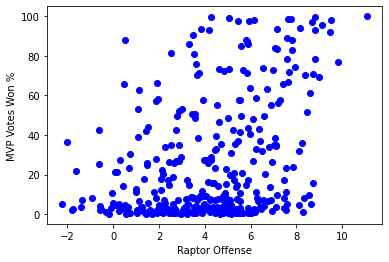

In [11]:
#Correlation between Raptors Offense and MVP Points %
import matplotlib
import matplotlib.pyplot as plt
plt.plot(df['raptor_offense'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel('Raptor Offense')

Text(0.5, 0, 'Raptor Defense')

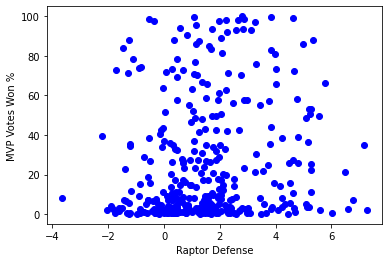

In [10]:
#Correlation between Raptors Defense and MVP Points %
plt.plot(df['raptor_defense'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel('Raptor Defense')

Text(0.5, 0, 'Raptor Total')

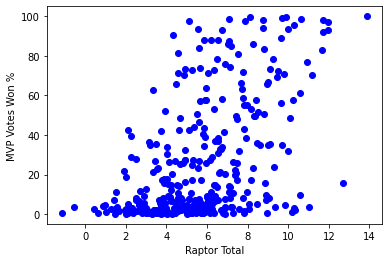

In [16]:
#Correlation between Raptors Total and MVP Points %
plt.plot(df['raptor_total'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel('Raptor Total')

Text(0.5, 0, 'PPG')

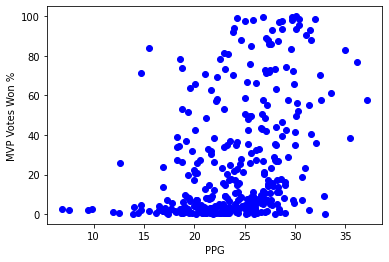

In [11]:
#Correlation between Points Per Game and MVP Points %
plt.plot(df['PTS'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel('PPG')

Text(0.5, 0, 'WIN%')

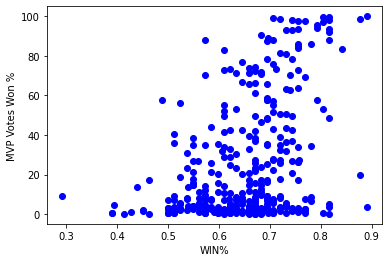

In [12]:
#Correlation between WIN % and MVP Points %
plt.plot(df['WIN'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel('WIN%')

Text(0.5, 0, 'Blocks Per Game')

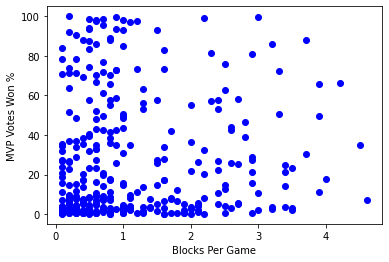

In [14]:
#Correlation between Blocks Per Game and MVP Points %
plt.plot(df['BLK'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel('Blocks Per Game')

Text(0.5, 0, 'Win Share Percentage')

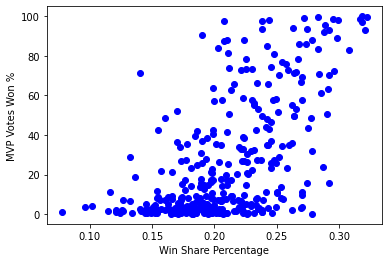

In [15]:
#Correlation between Win Share Percentage and MVP Points %
plt.plot(df['WS/48'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel('Win Share Percentage')

Text(0.5, 0, "Player's Position")

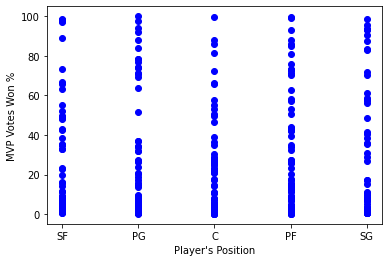

In [19]:
#Correlation between Player's Position and MVP Points %
plt.plot(df['Pos'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel("Player's Position")

Text(0.5, 0, 'Value over Replacement Player')

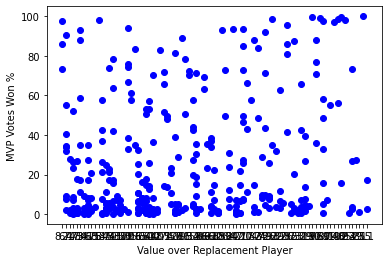

In [21]:
#Correlation between Value over Replacement Player and MVP Points %
plt.plot(df['VORP'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel("Value over Replacement Player")

Text(0.5, 0, 'Usage Rate')

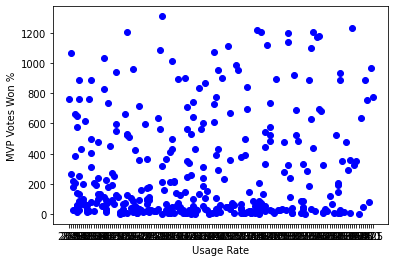

In [4]:
#Correlation between Usage Percentage and MVP Points %
plt.plot(df['USG%'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel("Usage Rate")

,Rank,Year,MVP,Player,Age,Tm,First,Pts Won,Pts Max,Share,...,OBPM,DBPM,BPM,VORP,PRE_ODDS,WIN,raptor_offense,raptor_defense,raptor_total,MVP Pts %
0,1,1985,1,Larry Bird,28.0,BOS,73.0,763.0,780,0.978,...,6.8,2.0,8.8,8.7,200,0.7683,5.919612,1.974251,7.893864,97.820513
1,2,1985,0,Magic Johnson,25.0,LAL,1.0,264.0,780,0.338,...,5.8,0.8,6.7,6.1,200,0.7561,6.792100,-0.064314,6.727787,33.846154
2,3,1985,0,Moses Malone,29.0,PHI,0.0,218.0,780,0.279,...,3.0,-1.4,1.6,2.7,250,0.7073,1.868875,0.652217,2.521092,27.948718
3,4,1985,0,Kareem Abdul-Jabbar,37.0,LAL,0.0,206.0,780,0.264,...,3.9,1.2,5.1,4.8,200,0.7561,2.454328,1.652245,4.106573,26.410256
4,5,1985,0,Terry Cummings,23.0,MIL,2.0,138.0,780,0.177,...,3.6,0.7,4.3,4.3,800,0.7195,2.110789,1.938454,4.049243,17.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,6,2019,0,Damian Lillard,28.0,POR,0.0,69.0,1010,0.068,...,6.6,-0.3,6.4,6.0,30000,0.6463,6.778516,-0.381945,6.396571,6.831683
347,7,2019,0,Joel Embiid,24.0,PHI,0.0,49.0,1010,0.049,...,4.0,0.9,4.9,3.8,2000,0.6220,2.628670,3.590693,6.219363,4.851485
348,8,2019,0,Kevin Durant,30.0,GSW,0.0,25.0,1010,0.025,...,5.4,0.1,5.5,5.1,-168,0.6951,4.971488,-0.175648,4.795840,2.475248
349,9,2019,0,Kawhi Leonard,27.0,TOR,0.0,13.0,1010,0.013,...,6.1,1.1,7.2,4.7,1850,0.7073,4.733646,0.666757,5.400404,1.287129


Text(0.5, 0, 'Age')

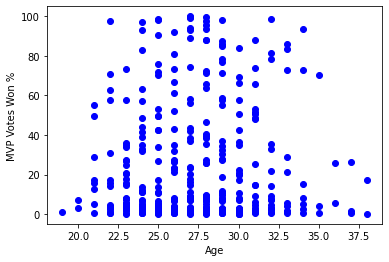

In [5]:
#Correlation between Age and MVP Points %
plt.plot(df['Age'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel("Age")

Text(0.5, 0, 'Preseason Odds')

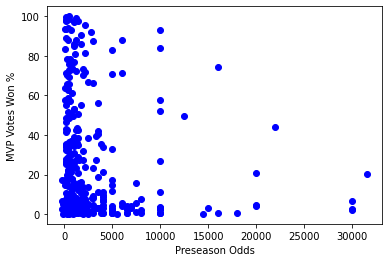

In [6]:
#Correlation between Preseason Odds and MVP Points %
plt.plot(df['PRE_ODDS'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel("Preseason Odds")

Text(0.5, 0, 'Rebounds Per Minute')

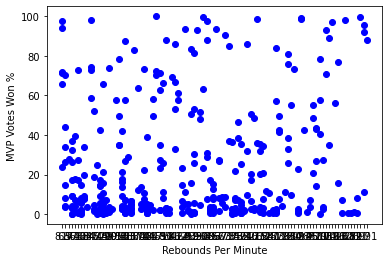

In [11]:
#Correlation between Boards Per Minute and MVP Points %
plt.plot(df['BPM'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel("Rebounds Per Minute")

Text(0.5, 0, 'Offensive Win Share')

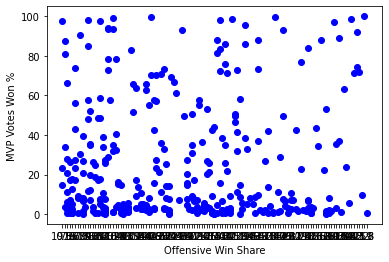

In [14]:
#Correlation between Offensive Win Share and MVP Points %
plt.plot(df['OWS'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel("Offensive Win Share")

Text(0.5, 0, 'Turnovers')

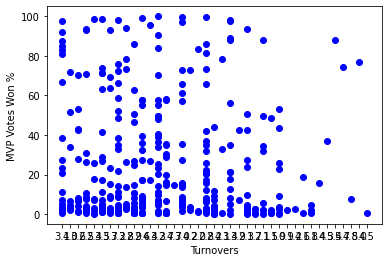

In [15]:
#Correlation between Turnovers and MVP Points %
plt.plot(df['TOV'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel("Turnovers")

Text(0.5, 0, 'Minutes Played')

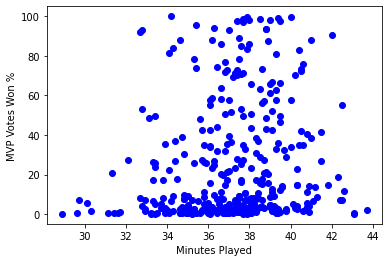

In [16]:
#Correlation between Minutes Played and MVP Points %
plt.plot(df['MP'], df['MVP Pts %'], 'bo')
plt.ylabel('MVP Votes Won %')
plt.xlabel("Minutes Played")

In [260]:
#to make it not predict for 2019 get rid of 0:340 that is 
#to make the training/testing data up to 2018 and not 
#include 2018-2019 season
y = df['Pts Won'][0:340]
y2 = df['MVP Pts %'][0:340]
#took out 3P% and 3PA because 3P% has a few NaNs might have to just take
#those rows out
features = ['WS/48', 'VORP', 
            'STL%', 'FT%', 'AST%', 'BLK%', 'FG%',
            'TRB%','WIN','FGA', 'FTA', 
            'TS%', 'USG%', 'BPM', '3PA', 
            'eFG%', '3P', 'PTS', 'PER']
#trying without raptor_total gives a better 
best_features = ['WS/48', 'VORP', 'STL%', 'FT%', 'AST%',
                 'BLK%', 'FG%', 'TRB%','WIN','FGA',
                 'FTA' , 'USG%', '3PA', 'PER']
other_features = ['PTS', 'WIN', 'AST%', 'FG%', 'VORP', 'WS/48', 'TRB%']

#when you wanna see what best features gets you just do 
features = best_features
x = df[features][0:340]
curr_df_2019 = df[340:]
display(curr_df_2019)
#display(x)
#display(x.count())

,Rank,Year,MVP,Player,Age,Tm,First,Pts Won,Pts Max,Share,...,OBPM,DBPM,BPM,VORP,PRE_ODDS,WIN,raptor_offense,raptor_defense,raptor_total,MVP Pts %
341,1,2019,1,Giannis Antetokounmpo,24.0,MIL,78.0,941.0,1010,0.932,...,6.3,4.1,10.4,7.4,10000,0.7317,4.184342,2.567988,6.752330,93.168317
342,2,2019,0,James Harden,29.0,HOU,23.0,776.0,1010,0.768,...,9.4,1.6,11.0,9.3,1000,0.6463,9.815956,1.121363,10.937320,76.831683
343,3,2019,0,Paul George,28.0,OKC,0.0,356.0,1010,0.352,...,5.6,1.6,7.2,6.6,3800,0.5976,5.316363,3.787824,9.104186,35.247525
344,4,2019,0,Nikola Jokic,23.0,DEN,0.0,212.0,1010,0.210,...,6.2,2.9,9.1,7.0,20000,0.6585,5.642959,1.762307,7.405266,20.990099
345,5,2019,0,Stephen Curry,30.0,GSW,0.0,175.0,1010,0.173,...,7.1,-0.5,6.6,5.1,-168,0.6951,7.482670,0.672822,8.155492,17.326733
346,6,2019,0,Damian Lillard,28.0,POR,0.0,69.0,1010,0.068,...,6.6,-0.3,6.4,6.0,30000,0.6463,6.778516,-0.381945,6.396571,6.831683
347,7,2019,0,Joel Embiid,24.0,PHI,0.0,49.0,1010,0.049,...,4.0,0.9,4.9,3.8,2000,0.6220,2.628670,3.590693,6.219363,4.851485
348,8,2019,0,Kevin Durant,30.0,GSW,0.0,25.0,1010,0.025,...,5.4,0.1,5.5,5.1,-168,0.6951,4.971488,-0.175648,4.795840,2.475248
349,9,2019,0,Kawhi Leonard,27.0,TOR,0.0,13.0,1010,0.013,...,6.1,1.1,7.2,4.7,1850,0.7073,4.733646,0.666757,5.400404,1.287129
350,10,2019,0,Russell Westbrook,30.0,OKC,0.0,8.0,1010,0.008,...,2.8,2.4,5.2,4.7,3800,0.5976,2.702463,-0.326028,2.376435,0.792079


In [67]:
def meanSquaredError_RF(xData, yData, xVal, yVal, estimators): 
    model = RandomForestRegressor(n_estimators = estimators, random_state = 23)
    model.fit(xData, yData)
    predictions = model.predict(xVal)
    return mean_squared_error(yVal, predictions)
def mse_MLP(hidden_layer_test, alphaVal, xData, yData, xVal, yVal):
    model = MLPRegressor(solver ='lbfgs', hidden_layer_sizes = hidden_layer_test, alpha=alphaVal, random_state = 23)
    model.fit(xData, yData)
    predictions = model.predict(xVal)
    return mean_squared_error(yVal, predictions)
def mse_logisticRegression(xData, yData, xVal, yVal):
    model = LogisticRegression(solver = 'lbfgs')

In [261]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import Ridge 
from sklearn import preprocessing

xScaled = preprocessing.scale(x)

xTrain, xVal, yTrain, yVal = train_test_split(xScaled, y, random_state = 23)
x2Train, x2Val, y2Train, y2Val = train_test_split(xScaled, y2, random_state = 24)

#test for best estimator options
#Random Forest
estimator_arr = [50, 75, 100, 200, 500, 1000]
print ("RANDOM FOREST OPTIONS TESTING")
#MSE = Mean Squared Error
for estimator in estimator_arr:
    print("Number of Estimators: ", estimator, "| MSE: ", meanSquaredError_RF(xTrain, yTrain, xVal, yVal, estimator))
bestModelRF = RandomForestRegressor(n_estimators = 75, random_state = 23)

print ('---------------------------------------')

#Multi-Layer Perceptron 
hidden_layer_sizes_arr = [50, 100, 150, 200, 250, 300]
alpha_arr = [.0001, .00025, .0003, .001, .003]
print("MLP OPTIONS TESTING")

#for num_layers in hidden_layer_sizes_arr:
    #for alpha in alpha_arr:
        #print("Layers: ", num_layers, "| Alpha: ", alpha, "| MSE: ", mse_MLP(num_layers, alpha, xTrain, yTrain, xVal, yVal))
        
#print ('---------------------------------------')
bestModelRF.fit(xTrain, yTrain)
bestModelSVR = svm.SVR()
bestModelSVR.fit(xTrain, yTrain)
bestModelRidge = Ridge()
bestModelRidge.fit(xTrain, yTrain)

RANDOM FOREST OPTIONS TESTING
Number of Estimators:  50 | MSE:  48408.91169727059
Number of Estimators:  75 | MSE:  47989.10107833725
Number of Estimators:  100 | MSE:  48668.73000856471
Number of Estimators:  200 | MSE:  50012.22111053236
Number of Estimators:  500 | MSE:  50192.77326320424
Number of Estimators:  1000 | MSE:  49785.308286937994
---------------------------------------
MLP OPTIONS TESTING


Ridge()

In [262]:
#2020 predictions
bestModelRFPrediction = bestModelRF.predict(preprocessing.scale(current_df[features]))
bestModelSVRPrediction = bestModelSVR.predict(preprocessing.scale(current_df[features]))
bestModelRidgePrediction = bestModelRidge.predict(preprocessing.scale(current_df[features]))
current_df['MVP Voting SVR'] = bestModelSVRPrediction
current_df['MVP Voting RF'] = bestModelRFPrediction
current_df['MVP Voting Ridge'] = bestModelRidgePrediction

print(current_df[['Player', 'MVP Voting RF']].sort_values('MVP Voting RF', ascending = False))
print("---------------------------")
print(current_df[['Player', 'MVP Voting SVR']].sort_values('MVP Voting SVR', ascending = False))
print("---------------------------")
print(current_df[['Player', 'MVP Voting Ridge']].sort_values('MVP Voting Ridge', ascending = False))


                  Player  MVP Voting RF
0  Giannis Antetokounmpo    1023.013333
2           James Harden     671.997333
1           LeBron James     407.040000
3          Anthony Davis     304.160000
4            Luka Doncic     227.053333
5          Kawhi Leonard     190.080000
7        Khris Middleton     136.440000
9           Jimmy Butler     123.026667
6           Nikola Jokic      84.213333
8             Kyle Lowry      44.186667
---------------------------
                  Player  MVP Voting SVR
0  Giannis Antetokounmpo      125.035323
3          Anthony Davis      121.277912
2           James Harden      118.795535
1           LeBron James      114.631144
4            Luka Doncic      111.994758
5          Kawhi Leonard      110.079681
6           Nikola Jokic      106.589101
7        Khris Middleton      101.854168
9           Jimmy Butler      100.125795
8             Kyle Lowry       96.621935
---------------------------
                  Player  MVP Voting Ridge
0  Giannis

In [263]:
#2019 predictions
bestModelRFPrediction = bestModelRF.predict(preprocessing.scale(curr_df_2019[features]))
bestModelSVRPrediction = bestModelSVR.predict(preprocessing.scale(curr_df_2019[features]))
bestModelRidgePrediction = bestModelRidge.predict(preprocessing.scale(curr_df_2019[features]))
curr_df_2019['MVP Voting SVR'] = bestModelSVRPrediction
curr_df_2019['MVP Voting RF'] = bestModelRFPrediction
curr_df_2019['MVP Voting Ridge'] = bestModelRidgePrediction
print(curr_df_2019[['Player', 'MVP Voting RF']].sort_values('MVP Voting RF', ascending = False))
print("---------------------------")
print(curr_df_2019[['Player', 'MVP Voting SVR']].sort_values('MVP Voting SVR', ascending = False))
print("---------------------------")
print(curr_df_2019[['Player', 'MVP Voting Ridge']].sort_values('MVP Voting Ridge', ascending = False))


                    Player  MVP Voting RF
341  Giannis Antetokounmpo     850.146667
342           James Harden     720.537333
349          Kawhi Leonard     228.506667
344           Nikola Jokic     220.586667
347            Joel Embiid     152.026667
348           Kevin Durant     137.586667
343            Paul George     122.306667
345          Stephen Curry      96.600000
346         Damian Lillard      85.640000
350      Russell Westbrook      38.200000
---------------------------
                    Player  MVP Voting SVR
341  Giannis Antetokounmpo      125.298690
342           James Harden      122.121775
347            Joel Embiid      112.493662
344           Nikola Jokic      110.676515
349          Kawhi Leonard      107.965753
348           Kevin Durant      106.254224
343            Paul George      103.169047
350      Russell Westbrook      102.554060
345          Stephen Curry      101.719906
346         Damian Lillard       99.042325
---------------------------
         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc